In [32]:
# 1. Wczytywanie danych i wyświetlanie podstawowych informacji
import pandas as pd

file_path = 'RZ-opiekunowie.csv'
df = pd.read_csv(file_path)
print(df.head())
print(df.info())
print(df.describe())


       Imię     Nazwisko  Województwo    Powiat                    Gmina  \
0   Izabela       Wójcik  MAZOWIECKIE  Warszawa  Warszawa - Praga-Północ   
1   Paulina     Pomorska  MAZOWIECKIE  Warszawa       Warszawa - Mokotów   
2      Anna     Spiechow  MAZOWIECKIE   otwocki                   Otwock   
3  Angelika  Rogaczewska    POMORSKIE    Gdańsk                   Gdańsk   
4   Paulina       Adamus      ŁÓDZKIE      Łódź         Łódź-Śródmieście   

  Kod pocztowy  Liczba miejsc  Liczba dzieci zapisanych  \
0       03-484              8                       5.0   
1       02-621              8                       8.0   
2       05-400              8                       8.0   
3       80-464              5                       5.0   
4       90-266              5                       8.0   

   Liczba miejsc ze środków FERS  Liczba dzieci zapisanych na miejsca z FERS  \
0                            0.0                                         0.0   
1                           

In [33]:
# 2. Obliczanie podstawowych statystyk
print("2.1. Średnia liczba miejsc: "+str(df['Liczba miejsc'].mean()))
print("2.2. Średnia liczba zapisanych dzieci: "+str(df['Liczba dzieci zapisanych'].mean()))
print("2.3. Suma miejsc ze środków FERS: "+str(df['Liczba miejsc ze środków FERS'].sum()))
df['Opłata miesięczna za pobyt'] = pd.to_numeric(df['Opłata miesięczna za pobyt'].str.replace(' zł', ''), errors='coerce')
print("2.4. Maksymalna opłata miesięczna za pobyt: "+str(df['Opłata miesięczna za pobyt'].max()))
df['Opłata za wyżywienie - dzienna'] = pd.to_numeric(df['Opłata za wyżywienie - dzienna'].str.replace(' zł', ''), errors='coerce')
print("2.5. Minimalna dzienna opłata za wyżywienie: "+str(df['Opłata za wyżywienie - dzienna'].min()))


1. Średnia liczba miejsc: 6.238877755511022
2. Średnia liczba zapisanych dzieci: 4.54491833030853
3. Suma miejsc ze środków FERS: 515.0
4. Maksymalna opłata miesięczna za pobyt: 3700.0
5. Minimalna dzienna opłata za wyżywienie: 0.0


In [34]:
# 3. Identyfikacja i obsluga brakujących danych

print("3.1. Liczba brakujących wartości w każdej kolumnie: "+str(df.isnull().sum()))
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("3.2. Procent brakujących danych w każdej kolumnie:")
print(missing_percentage.head(5))

# Usuwanie danych gdzie brakuje ponad 50% kolumn
threshold = 50 
columns_to_drop = missing_percentage[missing_percentage > threshold].index
df_cleaned = df.drop(columns=columns_to_drop)
print(f"3.3. Kolumny usunięte z powodu dużej liczby braków (> {threshold}%): ")
print(", ".join(columns_to_drop))

# Uzupełnianie brakujących w kolumnie "Opłata miesięczna za pobyt" danych średnią wartością
df_cleaned['Opłata miesięczna za pobyt'] = df_cleaned['Opłata miesięczna za pobyt'].fillna(df_cleaned['Opłata miesięczna za pobyt'].mean())

print("3.4. Dane po uzupełnieniu braków w wybranych kolumnach (pierwszych 5):")
print(df_cleaned.head(5))

3.1. Liczba brakujących wartości w każdej kolumnie: Imię                                                                                                               0
Nazwisko                                                                                                           0
Województwo                                                                                                        0
Powiat                                                                                                             0
Gmina                                                                                                              0
Kod pocztowy                                                                                                       0
Liczba miejsc                                                                                                      0
Liczba dzieci zapisanych                                                                                         291
Liczba miejs


Analiza kolumny: Opłata miesięczna za pobyt
Wartości odstające w kolumnie 'Opłata miesięczna za pobyt':
5         0.0
7         0.0
20        0.0
21        0.0
24        0.0
        ...  
2424    700.0
2461      0.0
2465    700.0
2474      0.0
2485      0.0
Name: Opłata miesięczna za pobyt, Length: 205, dtype: float64
Dolna granica: 750.0, Górna granica: 2750.0


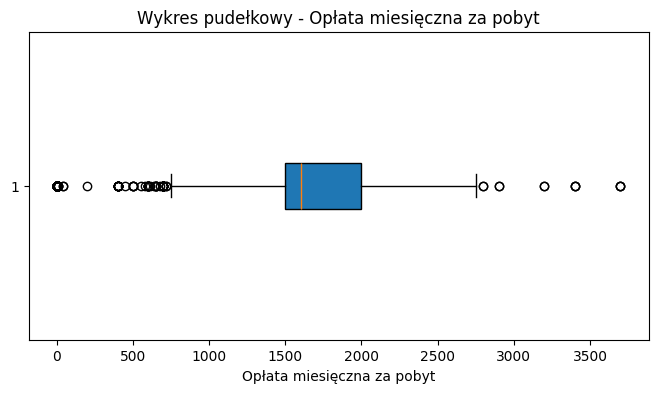

In [35]:
# 4. Wykrywanie wartości odstających
import numpy as np
import matplotlib.pyplot as plt

kolumny_analizowane = ['Opłata miesięczna za pobyt'] # Można dopisać więcej klonumn do przetwarzania i wizualizacji

# Metodą IRQ
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Wykrywanie odstających dla każdej kolumny
for kolumna in kolumny_analizowane:
    print(f"\nAnaliza kolumny: {kolumna}")
    outliers, lower, upper = detect_outliers_iqr(df, kolumna)
    print(f"Wartości odstające w kolumnie '{kolumna}':")
    print(outliers[kolumna])
    print(f"Dolna granica: {lower}, Górna granica: {upper}")

# Wizualizacja za pomocą wykresów pudełkowych
for kolumna in kolumny_analizowane:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[kolumna].dropna(), vert=False, patch_artist=True)
    plt.title(f"Wykres pudełkowy - {kolumna}")
    plt.xlabel(kolumna)
    plt.show()


5.1. Macierz korelacji:
                               Liczba miejsc  Liczba dzieci zapisanych  \
Liczba miejsc                       1.000000                  0.406514   
Liczba dzieci zapisanych            0.406514                  1.000000   
Liczba miejsc ze środków FERS       0.120113                  0.130622   
Opłata miesięczna za pobyt          0.078668                  0.083243   

                               Liczba miejsc ze środków FERS  \
Liczba miejsc                                       0.120113   
Liczba dzieci zapisanych                            0.130622   
Liczba miejsc ze środków FERS                       1.000000   
Opłata miesięczna za pobyt                          0.128428   

                               Opłata miesięczna za pobyt  
Liczba miejsc                                    0.078668  
Liczba dzieci zapisanych                         0.083243  
Liczba miejsc ze środków FERS                    0.128428  
Opłata miesięczna za pobyt                  

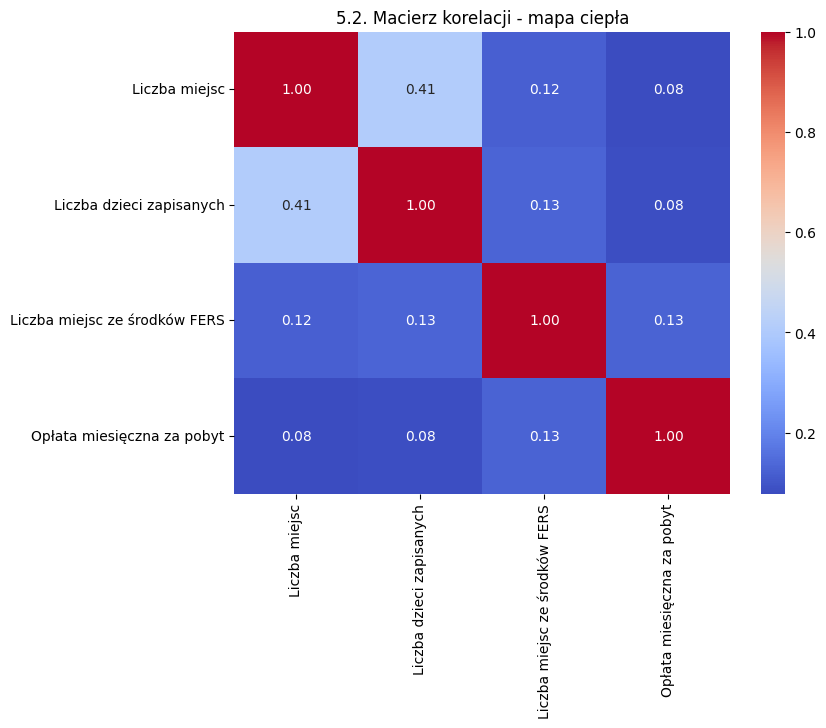

5.3. Zależność: Opłata miesięczna za pobyt a Liczba dzieci zapisanych


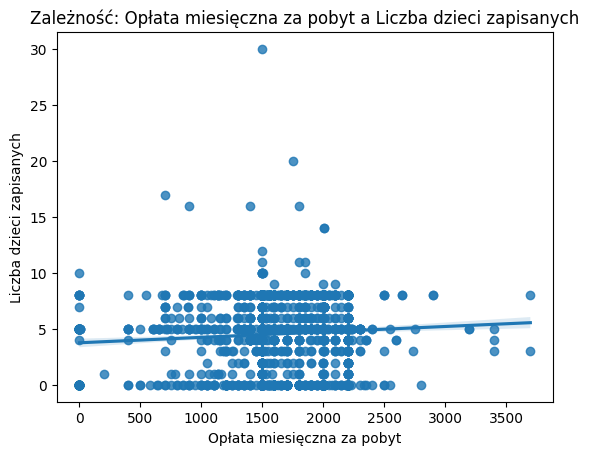

In [36]:
# 5. Analiza zalezności między kolumnami
import seaborn as sns
import matplotlib.pyplot as plt

kolumny = ['Liczba miejsc', 'Liczba dzieci zapisanych', 'Liczba miejsc ze środków FERS', 'Opłata miesięczna za pobyt']

# Obliczanie macierzy korelacji
macierz_korelacji = df[kolumny].corr()
print("5.1. Macierz korelacji:")
print(macierz_korelacji)
plt.figure(figsize=(8, 6))
sns.heatmap(macierz_korelacji, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("5.2. Macierz korelacji - mapa ciepła")
plt.show()

print("5.3. Zależność: Opłata miesięczna za pobyt a Liczba dzieci zapisanych")
sns.regplot(data=df, x='Opłata miesięczna za pobyt', y='Liczba dzieci zapisanych')
plt.title("Zależność: Opłata miesięczna za pobyt a Liczba dzieci zapisanych")
plt.xlabel("Opłata miesięczna za pobyt")
plt.ylabel("Liczba dzieci zapisanych")
plt.show()


In [37]:
# 6. Przekształcanie danych
df['Suma miejsc i dzieci'] = df['Liczba miejsc'] + df['Liczba dzieci zapisanych']

print("6.1. Nowa kolumna 'Suma miejsc i dzieci':")
print(df.head())

print("6.2. Grupowanie po województwie i obliczanie średnich:")
grouped_by_wojewodztwo = df.groupby('Województwo')
print(grouped_by_wojewodztwo.head(5))

print("6.3. Sortowanie po kolumnie 'Opłata miesięczna za pobyt':")
sorted_df = df.sort_values(by='Opłata miesięczna za pobyt', ascending=True)
print(sorted_df.head(5))

print("6.4. Sortowanie po 'Województwo' i 'Liczba dzieci zapisanych':")
sorted_multi = df.sort_values(by=['Województwo', 'Liczba dzieci zapisanych'], ascending=[True, False])
print(sorted_multi.head(5))

6.1. Nowa kolumna 'Suma miejsc i dzieci':
       Imię     Nazwisko  Województwo    Powiat                    Gmina  \
0   Izabela       Wójcik  MAZOWIECKIE  Warszawa  Warszawa - Praga-Północ   
1   Paulina     Pomorska  MAZOWIECKIE  Warszawa       Warszawa - Mokotów   
2      Anna     Spiechow  MAZOWIECKIE   otwocki                   Otwock   
3  Angelika  Rogaczewska    POMORSKIE    Gdańsk                   Gdańsk   
4   Paulina       Adamus      ŁÓDZKIE      Łódź         Łódź-Śródmieście   

  Kod pocztowy  Liczba miejsc  Liczba dzieci zapisanych  \
0       03-484              8                       5.0   
1       02-621              8                       8.0   
2       05-400              8                       8.0   
3       80-464              5                       5.0   
4       90-266              5                       8.0   

   Liczba miejsc ze środków FERS  Liczba dzieci zapisanych na miejsca z FERS  \
0                            0.0                                  